In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.preprocessing import OneHotEncoder
from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
%matplotlib inline

In [2]:
DF = pd.read_csv('food-inspections.csv', sep = ',')
DF.head(5)
print(len(DF))

194814


In [3]:
#drop null & reindex DF
DF = DF.dropna(subset = ['Violations','Facility Type','Risk','Longitude','Latitude'])
print(len(DF))

DF.index = range(1,len(DF) + 1)

142505


In [4]:
#parse date
DF['year'] = DF['Inspection Date'].apply(lambda x:x.split('-')[0])
DF['month'] = DF['Inspection Date'].apply(lambda x:x.split('-')[1])
DF['day'] = DF['Inspection Date'].apply(lambda x:x.split('-')[2])
DF['day'] = DF['day'].apply(lambda x:x.split('T')[0])
DF.head(5)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,year,month,day
1,2320342,YOLK TEST KITCHEN,YOLK TEST KITCHEN,2589655.0,Restaurant,Risk 1 (High),1767 N MILWAUKEE AVE,CHICAGO,IL,60647.0,...,-87.682203,"{'longitude': '41.9135877900482', 'latitude': ...",NaN,NaN,NaN,NaN,NaN,2019,10,23
2,2320319,LA PALAPITA,LA PALAPITA,2694702.0,Restaurant,Risk 1 (High),3834 W 47TH ST,CHICAGO,IL,60632.0,...,-87.720037,"{'longitude': '41.80802515275297', 'latitude':...",NaN,NaN,NaN,NaN,NaN,2019,10,23
3,2320228,47TH ST CANTINA,47TH ST CANTINA,2678250.0,Liquor,Risk 3 (Low),4311 W 47TH ST,CHICAGO,IL,60632.0,...,-87.731480,"{'longitude': '41.80766199360051', 'latitude':...",NaN,NaN,NaN,NaN,NaN,2019,10,22
4,2320261,CRAZY BIRD,CRAZY BIRD,2616198.0,Restaurant,Risk 1 (High),1160 W GRAND AVE,CHICAGO,IL,60642.0,...,-87.657055,"{'longitude': '41.891193484441246', 'latitude'...",NaN,NaN,NaN,NaN,NaN,2019,10,22
5,2320245,THE REDHEAD PIANO BAR,THE REDHEAD PIANO BAR,2313945.0,Restaurant,Risk 3 (Low),16-18 W ONTARIO ST,CHICAGO,IL,60654.0,...,-87.628783,"{'longitude': '41.893370903547904', 'latitude'...",NaN,NaN,NaN,NaN,NaN,2019,10,22


<BarContainer object of 12 artists>

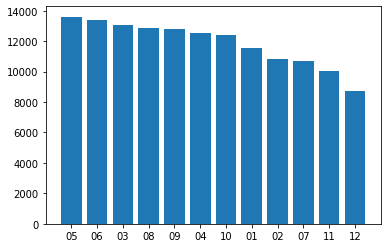

In [35]:
#number of inspections by month
month = DF.month.value_counts().index
mcounts = DF.month.value_counts()
plt.bar(month,mcounts)

<BarContainer object of 10 artists>

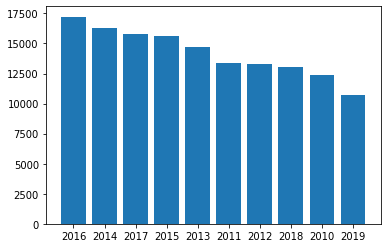

In [23]:
#number of inspections by year
year = DF_sort.year.value_counts().index
ycounts = DF_sort.year.value_counts()
plt.bar(year,ycounts)

<BarContainer object of 3 artists>

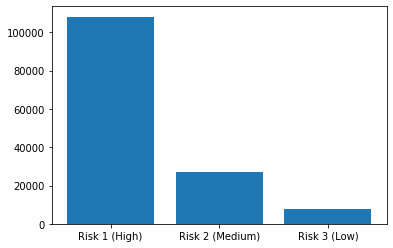

In [7]:
#DF.Risk.value_counts().plot(kind='bar')
risk = DF.Risk.value_counts().index
rcounts = DF.Risk.value_counts()
plt.bar(risk,rcounts)

Restaurant                      98157
Grocery Store                   17959
School                          10363
Children's Services Facility     2318
Bakery                           2167
Name: Facility Type, dtype: int64


<BarContainer object of 5 artists>

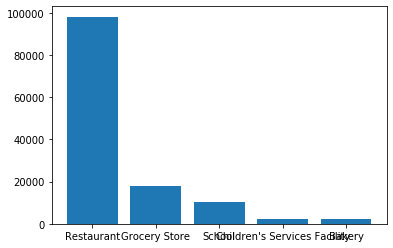

In [13]:
facility = DF['Facility Type'].value_counts().index
fcounts = DF['Facility Type'].value_counts()
print(fcounts.head())
plt.bar(facility[0:5],fcounts.head(5))

([<matplotlib.patches.Wedge at 0x2b82b138908>,
 [Text(-0.7060591376146642, 0.8434930315010533, 'Restaurant'),
  Text(0.2591336585443739, -1.0690415085530627, 'Grocery Store'),
  Text(0.8598427334030962, -0.6860542790580729, 'School'),
  Text(1.023492353177944, -0.403067491850031, "Children's Services Facility"),
  Text(1.0596528786910562, -0.29518769737534417, 'Bakery'),
  Text(1.0824788525965392, -0.195549312658675, 'Daycare (2 - 6 Years)'),
  Text(1.0951128939920476, -0.10357484932338754, 'Daycare Above and Under 2 Years'),
  Text(1.09961615797, -0.029056929144296854, 'Long Term Care')])

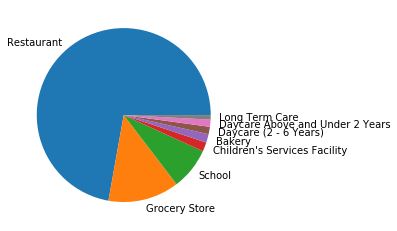

In [9]:
plt.pie(x = fcounts.head(8),labels = facility[0:8])

<BarContainer object of 6 artists>

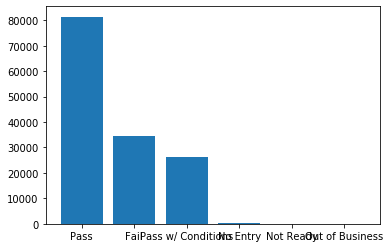

In [16]:
result = DF['Results'].value_counts().index
rscounts = DF['Results'].value_counts()
plt.bar(result,rscounts)

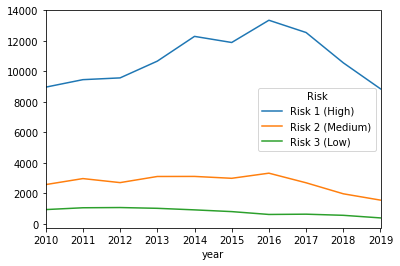

In [11]:
DF_yearisk = DF.groupby(['year','Risk'])['Inspection ID'].agg('count').unstack('Risk')
DF_yearisk.plot()

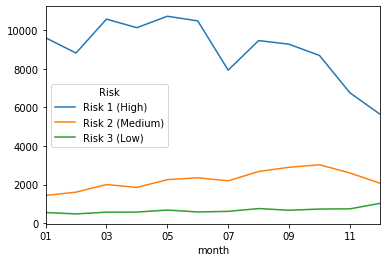

In [12]:
DF_monthrisk = DF.groupby(['month','Risk'])['Inspection ID'].agg('count').unstack('Risk')
DF_monthrisk.plot()

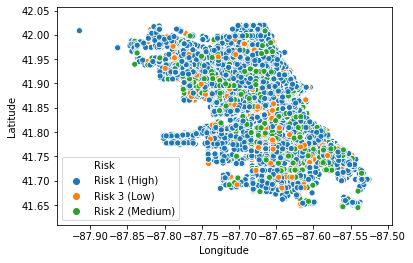

In [13]:
sns.scatterplot(x='Longitude',y='Latitude',hue='Risk',data = DF)

In [14]:
Facilitylist = ['Restaurant','Grocery Store', 'School','Children\'s Services Facility', 'Bakery']
risksum = [0,0,0,0,0]; riskavg = [0,0,0,0,0]
for j in range(0,5):
    for i in range(1,len(DF)):
        if DF['Facility Type'][i] == Facilitylist[j]:
            if DF['Risk'][i] == 'Risk 1 (High)':
                risksum[j] = risksum[j] + 1
            if DF['Risk'][i] == 'Risk 2 (Medium)':
                risksum[j] = risksum[j] + 2
            if DF['Risk'][i] == 'Risk 3 (Low)':
                risksum[j] = risksum[j] + 3
    riskavg[j] = risksum[j]/fcounts[j]
print(riskavg)

[1.1863137626455575, 1.954340442118158, 1.1151211039274342, 1.0060396893874028, 1.5856022150438394]


In [18]:
Resultlist = ['Pass','Fail', 'Pass w/ Conditions','No Entry']
risksum = [0,0,0,0]; riskavg = [0,0,0,0]
for j in range(0,4):
    for i in range(1,len(DF)):
        if DF['Results'][i] == Resultlist[j]:
            if DF['Risk'][i] == 'Risk 1 (High)':
                risksum[j] = risksum[j] + 1
            if DF['Risk'][i] == 'Risk 2 (Medium)':
                risksum[j] = risksum[j] + 2
            if DF['Risk'][i] == 'Risk 3 (Low)':
                risksum[j] = risksum[j] + 3
    riskavg[j] = risksum[j]/rscounts[j]
print(riskavg)

[1.2852315178922533, 1.369254000058077, 1.2449587534372135, 1.3976744186046512]


In [8]:
feature_cols = ['Latitude', 'Longitude']
X = DF[feature_cols]
X.describe()

risk = [1]*len(DF)
for i in range(1,len(DF)):
    if DF['Risk'][i] == 'Risk 2 (Medium)':
        risk[i] = 2
    if DF['Risk'][i] == 'Risk 3 (Low)':
        risk[i] = 3

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X, risk)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
for f in range(len(feature_cols)):
    print("{0} * {1} + ".format(lin_reg.coef_[f], feature_cols[f]))
print(lin_reg.intercept_)

-0.033078471017476185 * Latitude + 
0.026372711130334955 * Longitude + 
4.996283022795435


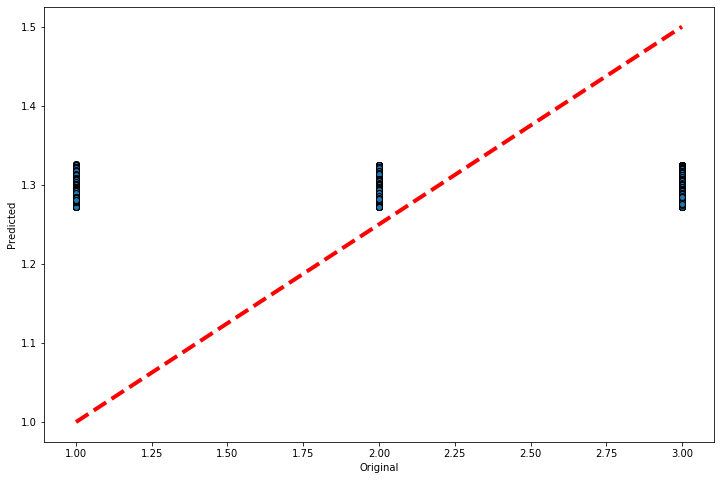

In [11]:
lr = LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X, risk, cv=5)

# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(risk, predicted, edgecolors=(0, 0, 0))
ax.plot([min(risk), max(risk)], [min(risk), max(risk)/2], 'r--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()